In [1]:
# The Project is to create a model which can detect whether the image is of cat or dog

In [2]:
# importing libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [3]:
# Data is already divided into train set and test set and are in seperate folder
# Let's load the training data and test data which then can be used to create,train and test the model

In [4]:
# Training data preprocessing
training_generator = ImageDataGenerator(
                                    rescale=1./255, 
                                    zoom_range = 0.2,
                                    shear_range=0.2,
                                    horizontal_flip=True)

In [5]:
# connecting the training_generator with the training data
training_data = training_generator.flow_from_directory(
                                                        'dataset\\training_set',
                                                        target_size = (64,64),
                                                        batch_size=32,
                                                        class_mode='binary')

Found 8000 images belonging to 2 classes.


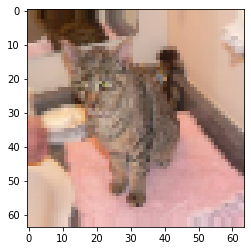

In [6]:
# Let's view some images
import matplotlib.pyplot as plt

plt.imshow(training_data[0][0][0])

In [7]:
# Let's create a testing generator
testing_generator = ImageDataGenerator(rescale=1./255)

In [8]:
# Getting the test data
testing_data = testing_generator.flow_from_directory(
                                                    'dataset\\test_set',
                                                     target_size=(64,64),
                                                     batch_size=32,
                                                     class_mode='binary'
                                                )

Found 2000 images belonging to 2 classes.


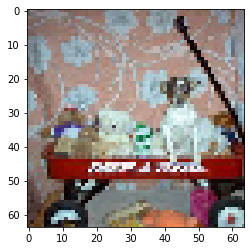

In [9]:
# let's view image from testing data
plt.imshow(testing_data[0][0][5])


In [15]:
# Now we have our data
# Let's build our CNN model

cnn = Sequential()

# 1st convolutional layer
cnn.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(64,64,3)))
cnn.add(MaxPool2D(pool_size=2,strides=2))

#2nd convolutional layer
cnn.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))

# Flatening - so that it can used with ANN layers
cnn.add(Flatten())

# 1st ANN layer
cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.2))

#2nd ANN layer
cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.2))

# output layer
cnn.add(Dense(1,activation='sigmoid'))


# compiler
cnn.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

# summary
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               802944    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [16]:
# Let's fit our model
cnn.fit(x=training_data,validation_data=testing_data,epochs=20)

Epoch 1/20
250/250 [==============================] - 212s 758ms/step - loss: 0.6753 - accuracy: 0.5713 - val_loss: 0.6336 - val_accuracy: 0.6260
Epoch 2/20
250/250 [==============================] - 79s 316ms/step - loss: 0.6061 - accuracy: 0.6726 - val_loss: 0.5752 - val_accuracy: 0.7150
Epoch 3/20
250/250 [==============================] - 81s 323ms/step - loss: 0.5670 - accuracy: 0.7065 - val_loss: 0.5470 - val_accuracy: 0.7330
Epoch 4/20
250/250 [==============================] - 88s 353ms/step - loss: 0.5460 - accuracy: 0.7200 - val_loss: 0.5161 - val_accuracy: 0.7545
Epoch 5/20
250/250 [==============================] - 86s 344ms/step - loss: 0.5099 - accuracy: 0.7504 - val_loss: 0.4937 - val_accuracy: 0.7710
Epoch 6/20
250/250 [==============================] - 91s 363ms/step - loss: 0.4831 - accuracy: 0.7685 - val_loss: 0.4648 - val_accuracy: 0.7735
Epoch 7/20
250/250 [==============================] - 90s 360ms/step - loss: 0.4714 - accuracy: 0.7779 - val_loss: 0.4495 - val_a

In [17]:
import pandas as pd

# Let's evaluate the loss on training and validation data
metrics = pd.DataFrame(cnn.history.history)

metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.675263,0.571250,0.633563,0.6260
1,0.606055,0.672625,0.575204,0.7150
2,0.567015,0.706500,0.547032,0.7330
3,0.546020,0.720000,0.516073,0.7545
4,0.509880,0.750375,0.493681,0.7710


<AxesSubplot:>

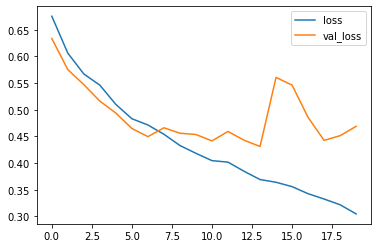

In [18]:
# Let's compare the loss
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

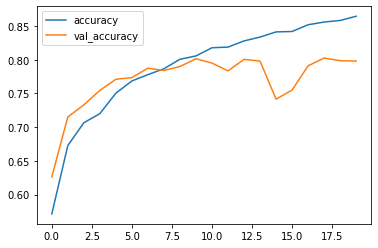

In [19]:
metrics[['accuracy','val_accuracy']].plot()

In [20]:
# Let's save the cnn model
cnn.save('cat_or_dog.h5')

In [23]:
# Let's test it on few images
test_image = image.load_img('C:\\Users\\Abhimanyu\\kaggle\\CNN\\cat-or-dog\\dataset\\single_prediction\\test-dog.jpg',target_size = (64,64))
# converting the image into 2d array for predict method to understand
test_image = image.img_to_array(test_image)
# using numpy to make the test_image into required shape
test_image = np.expand_dims(test_image,axis=0)
result = (cnn.predict(test_image/255.0)>0.5).astype('int32')
if result == 1:
    print('Dog')
else:
    print('Cat')

Dog


In [25]:
# Let's test it on another dog
test_image = image.load_img('C:\\Users\\Abhimanyu\\kaggle\\CNN\\cat-or-dog\\dataset\\single_prediction\\test-dog-2.jpg',target_size = (64,64))
# converting the image into 2d array for predict method to understand
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = (cnn.predict(test_image/255.0)>0.5).astype('int32')
if result == 1:
    print('Dog')
else:
    print('Cat')

Dog


In [30]:
# Let's tests it on some cats
test_image = image.load_img('C:\\Users\\Abhimanyu\\kaggle\\CNN\\cat-or-dog\\dataset\\single_prediction\\cat_or_dog_2.jpg',target_size = (64,64))
# converting the image into 2d array for predict method to understand
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = (cnn.predict(test_image/255.0)>0.5).astype('int32')
if result == 1:
    print('Dog')
else:
    print('Cat')

Cat


In [32]:
# Let's tests it on another dog
test_image = image.load_img('C:\\Users\\Abhimanyu\\kaggle\\CNN\\cat-or-dog\\dataset\\single_prediction\\cat_or_dog_8.jpg',target_size = (64,64))
# converting the image into 2d array for predict method to understand
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = (cnn.predict(test_image/255.0)>0.5).astype('int32')
if result == 1:
    print('Dog')
else:
    print('Cat')

Cat


# Model Accuracy 80%

# THANK YOU